<a href="https://colab.research.google.com/github/patwalbhumika/IPLSentimentAnalysis/blob/main/IPL_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Labelled_Dataset.csv'
# Load dataset into pandas DataFrame
data = pd.read_csv(file_path)

#to display size
print("size and columns of training_dataset- ",data.shape)

#to display count of different values
value_counts = data['Sentiment'].value_counts()
print(value_counts)


size and columns of training_dataset-  (1690, 2)
Sentiment
Positive    1246
Neutral      292
Negative     152
Name: count, dtype: int64


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
print("DONE")

DONE


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data['english_text'], data['Sentiment'], test_size=0.2, random_state=42)

#converts them into 1Darray
y_train=y_train.values
y_test=y_test.values


#BAG OF WORDS

In [ ]:
# Initialising CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data
x_train_bow = vectorizer.fit_transform(x_train)

# Transform the testing data
x_test_bow = vectorizer.transform(x_test)

print("This is what Bag Of Words(BOW) Representation looks like-")
print(x_train_bow[:10].toarray())
print("\n**Bag Of Words SUCCESSFUL**")

This is what Bag Of Words(BOW) Representation looks like-
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

**Bag Of Words SUCCESSFUL**


**Now X_train_bow and X_test_bow contain the bag-of-words representations of the training and testing data respectively**

#TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer_tfidf = TfidfVectorizer()

# Fit and transform the training data
x_train_tfidf = vectorizer_tfidf.fit_transform(x_train)

# Transform the testing data
x_test_tfidf = vectorizer_tfidf.transform(x_test)

print("This is what TF-IDF representation looks like-")
print(x_train_tfidf[:10].toarray())
print("\n**TF-IDF Suuccessful!**")

This is what TF-IDF representation looks like-
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

**TF-IDF Suuccessful!**


#wordToVec

In [ ]:
import numpy as np
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

tokenized_train = [word_tokenize(text.lower()) for text in x_train]
tokenized_test = [word_tokenize(text.lower()) for text in x_test]

# Training Word2Vec model
model_w2v = Word2Vec(sentences=tokenized_train, vector_size=100, window=5, min_count=1, workers=4)

# Function to create average word vectors
def feature_vectorizer(tokens, model):
    words = [word for word in tokens if word in model.wv]
    if words:
        return np.mean(model.wv[words], axis=0)
    else:
        return np.zeros(100)

# Transforming text into average vectors
x_train_w2v = np.array([feature_vectorizer(text, model_w2v) for text in tokenized_train])
x_test_w2v = np.array([feature_vectorizer(text, model_w2v) for text in tokenized_test])

print("\nThis is what Word To Vector(w2v) Representation looks like-")
print(x_train_w2v[:2])
print("\n**Word2Vec SUCCESSFULLY GENERATED!**")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



This is what Word To Vector(w2v) Representation looks like-
[[-0.32488632  0.24875031  0.7091906   0.62616247  0.08940253 -0.31426674
   0.69132054  0.7658315  -0.44001874 -0.65975046  0.4768306  -0.48870552
  -0.11263651  0.19171181  0.41283408  0.19883606  0.80188423  0.30071914
  -1.1873511  -0.91156554  0.1704704   0.06109537  0.9596731  -0.6920587
   0.22368987  0.23729406  0.19482853  0.7446874  -0.4848268   0.3740386
   0.10328111 -0.55129373  0.07035979 -0.72166175 -0.29343075  0.26146987
   0.7571154   0.13201755  0.16523921  0.89449805 -0.05182334  0.52801186
  -0.8554752  -0.1477642   0.07812133  0.42058885  0.19702749  0.23946537
   0.2064757   0.6058834  -0.03227258 -0.18932602 -0.5673448  -0.43906766
  -0.08520837  0.06133651  0.56975406 -0.02269164 -0.10805091  0.5614759
  -0.4546945  -0.21156956  0.10593054 -0.6098134  -0.6110708   0.7379656
   0.44085053  0.6976116  -0.04516224  0.33145297  0.6574431   0.20796421
   0.8349245   0.3984675   0.01918834 -0.21731852  0.12

#using RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialization
rfc_bow = RandomForestClassifier()
rfc_tfidf = RandomForestClassifier()
rfc_w2v = RandomForestClassifier()

# Training the classifiers on different feature sets
rfc_bow.fit(x_train_bow, y_train)
rfc_tfidf.fit(x_train_tfidf, y_train)
rfc_w2v.fit(x_train_w2v, y_train)

# Predicting sentiment labels for the testing data
y_predict1 = rfc_bow.predict(x_test_bow)
y_predict2 = rfc_tfidf.predict(x_test_tfidf)
y_predict3 = rfc_w2v.predict(x_test_w2v)

# Calculating the accuracy of model
accuracy_rfc_BOW = accuracy_score(y_test, y_predict1)
print("Random Forest Accuracy (BAG OF WORDS):", accuracy_rfc_BOW)

accuracy_rfc_tfidf = accuracy_score(y_test, y_predict2)
print("Random Forest Accuracy(TF-IDF):", accuracy_rfc_tfidf)

accuracy_rfc_w2v = accuracy_score(y_test, y_predict3)
print("Random Forest Accuracy:(W2V)", accuracy_rfc_w2v)


Random Forest Accuracy (BAG OF WORDS): 0.727810650887574
Random Forest Accuracy(TF-IDF): 0.7485207100591716
Random Forest Accuracy:(W2V) 0.6863905325443787


#Now lets do it using Naive_Bayes classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import accuracy_score

# Initialization
#multinomial -> design for count-based  feature vectors(non-negative integers),
# word2vec contains continuous values(real numbers), so GaussianNB is more suitable
nb_classifier_bow = MultinomialNB()
nb_classifier_ifidf = MultinomialNB()
nb_classifier_w2v = GaussianNB()

# Train the classifier on training data BOW representation
nb_classifier_bow.fit(x_train_bow, y_train)
nb_classifier_ifidf.fit(x_train_tfidf, y_train)
nb_classifier_w2v.fit(x_train_w2v, y_train)

# Predicting sentiment labels for the testing data
y_pred_nb1 = nb_classifier_bow.predict(x_test_bow)
y_pred_nb2 = nb_classifier_ifidf.predict(x_test_tfidf)
y_pred_nb3 = nb_classifier_w2v.predict(x_test_w2v)

# Calculating the Naive bayes accuracy for different methods
accuracy_nb_BOW = accuracy_score(y_test, y_pred_nb1)
print("Naive Bayes Accuracy (BAG OF WORDS):", accuracy_nb_BOW)

accuracy_nb_tfidf = accuracy_score(y_test, y_pred_nb2)
print("Naive Bayes Accuracy(TF-IDF):", accuracy_nb_tfidf)

accuracy_nb_w2v = accuracy_score(y_test, y_pred_nb3)
print("Naive Bayes Accuracy (W2V): ", accuracy_nb_w2v)


Naive Bayes Accuracy (BAG OF WORDS): 0.7603550295857988
Naive Bayes Accuracy(TF-IDF): 0.727810650887574
Naive Bayes Accuracy (W2V):  0.5443786982248521


#Now,lets plot a table for comparing all different methods and classifiers

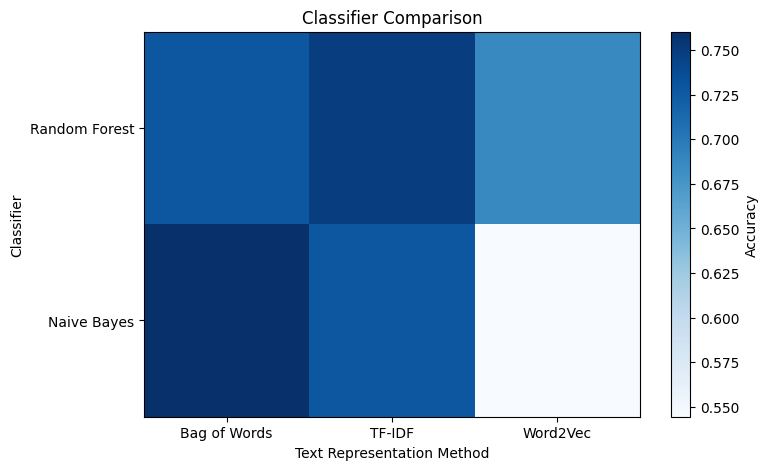

In [ ]:
import matplotlib.pyplot as plt

# Define the classifiers and methods
classifiers = ['Random Forest', 'Naive Bayes']
methods = ['Bag of Words', 'TF-IDF', 'Word2Vec']

# Define the accuracy values
rfc_accuracies = [accuracy_rfc_BOW, accuracy_rfc_tfidf,accuracy_rfc_w2v]
nb_accuracies = [accuracy_nb_BOW, accuracy_nb_tfidf, accuracy_nb_w2v]

# Create a comparison matrix
comparison_matrix = [rfc_accuracies , nb_accuracies]

# Plot the comparison matrix
plt.figure(figsize=(8, 5))
plt.imshow(comparison_matrix, interpolation='nearest', cmap='Blues', aspect='auto') #cmap->colormap
#matrix title
plt.title('Classifier Comparison')
plt.colorbar(label='Accuracy')
plt.xticks(range(len(methods)), methods)
plt.yticks(range(len(classifiers)), classifiers)
plt.xlabel('Text Representation Method')
plt.ylabel('Classifier')
plt.show()

#Let's now calculate the most effective method ***(mathematically)***

In [ ]:
# Calculate the average accuracy for each method
avg_accuracy_bow = (accuracy_rfc_BOW + accuracy_nb_BOW) / 2
avg_accuracy_tfidf = (accuracy_rfc_tfidf + accuracy_nb_tfidf) / 2
avg_accuracy_w2v = (accuracy_rfc_w2v + accuracy_nb_w2v) / 2

# Print the average accuracies
print("Average Accuracy (Bag of Words):", avg_accuracy_bow)
print("Average Accuracy (TF-IDF):", avg_accuracy_tfidf)
print("Average Accuracy (Word2Vec):", avg_accuracy_w2v)

# Determine the most effective method
most_effective_method = max(avg_accuracy_bow, avg_accuracy_tfidf, )#avg_accuracy_w2v)
if most_effective_method == avg_accuracy_bow:
    print("Most effective method: Bag of Words")
elif most_effective_method == avg_accuracy_tfidf:
    print("Most effective method: TF-IDF")
else:
    print("Most effective method: Word2Vec")


Average Accuracy (Bag of Words): 0.7470414201183432
Average Accuracy (TF-IDF): 0.735207100591716
Average Accuracy (Word2Vec): 0.6153846153846154
Most effective method: Bag of Words
